In [1]:
%matplotlib notebook

In [2]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

#study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

#read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#combine data into single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#check the number of mice
unique_mice = combined_data_df["Mouse ID"].unique()
total_unique_mice = len(unique_mice)
total_unique_mice

249

In [ ]:
#getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicate_mice

In [5]:
#get all the data for the duplicate Mouse ID
duplicate_data = combined_data_df[combined_data_df["Mouse ID"] =="g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
#create a clean dataframe by dropping the duplicate mouse by its ID
clean_data_df = combined_data_df[combined_data_df["Mouse ID"] != "g989"]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#check the number of mice in the clean dataframe
len(set(clean_data_df["Mouse ID"]))

248

In [8]:
#generate summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using groupby

mean = clean_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = clean_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
standard_error = clean_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_stats_table = pd.DataFrame({"Mean Tumor Volume": mean,  
                                   "Median Tumor Volume": median, 
                                   "Tumor Volume Variance": variance, 
                                   "Tumor Volume Std. Dev.": standard_deviation, 
                                   "Tumor Volume Std. Err.": standard_error})

summary_stats_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#generate a summary statistics table for the same data using agg
summary_stats_table_2 = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

summary_stats_table_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>


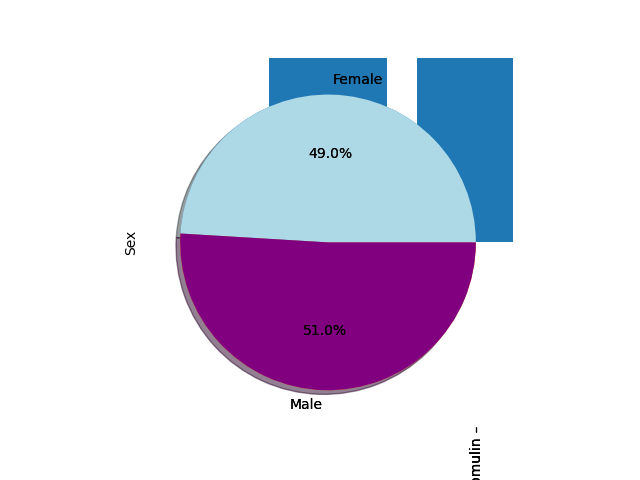

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [10]:
#generate a bar plot showing the total number of timepoints for all mice tested using pandas
total_timepoints = clean_data_df.groupby(["Drug Regimen"])["Mouse ID"].count()
total_timepoints.plot(kind = "bar", x = "Drug Regimen", y = total_timepoints )
total_timepoints

In [11]:
#generate a bar plot showing the total number of timepoints for all mice tested using pyplot
plt.bar(total_timepoints.index.values, total_timepoints.values)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

In [12]:
#generate pie plot showing distribution of male vs female using pandas
male_vs_female = clean_data_df.groupby(["Sex"])["Sex"].count()
male_vs_female.plot(kind= "pie", autopct="%1.1f%%")
male_vs_female

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [13]:
#generate pie plot showing distribution of male vs female using matplotlib
colors = ["lightblue", "purple"]
plt.pie(male_vs_female.values, labels=male_vs_female.index.values , colors= colors, autopct="%1.1f%%", shadow = True)
plt.show()

In [14]:
#calculate the final tumor volume of each mouse across capomulin, ramicane, infubinol, and ceftamin
last_timepoint_each = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint_each = last_timepoint_each.reset_index()

#merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_data = pd.merge(last_timepoint_each, clean_data_df, on=["Mouse ID", "Timepoint"], how= "left")

merge_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [20]:
#put treatments into a list for a for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#create empty list to fill with tumor vol data (for plotting)
tumor_data = []

for drug in treatments:
    
    tumor_volume_data = merge_data.loc[merge_data["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_data.append(tumor_volume_data)
    
    #calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = tumor_volume_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f"The lower quartile of volume is: {lowerq}")
    print(f"The upper quartile of volume is: {upperq}")
    print(f"The interquartile range of volume is: {iqr}")
    print(f"The median of occupancy is: {quartiles[.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volume_data.loc[(tumor_volume_data < lower_bound) | (tumor_volume_data > upper_bound)]
    outliers
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers:")
 

The lower quartile of volume is: 32.37735684
The upper quartile of volume is: 40.1592203
The interquartile range of volume is: 7.781863460000004
The median of occupancy is: 38.1251644
Values below 20.70456164999999 could be outliers
Values above 51.83201549 could be outliers:
The lower quartile of volume is: 31.56046955
The upper quartile of volume is: 40.65900627
The interquartile range of volume is: 9.098536719999998
The median of occupancy is: 36.56165229
Values below 17.912664470000003 could be outliers
Values above 54.30681135 could be outliers:
The lower quartile of volume is: 54.04860769
The upper quartile of volume is: 65.52574285
The interquartile range of volume is: 11.477135160000003
The median of occupancy is: 60.16518046
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers:
The lower quartile of volume is: 48.72207785
The upper quartile of volume is: 64.29983003
The interquartile range of volume is: 15.577752179999997
The median

<IPython.core.display.Javascript object>


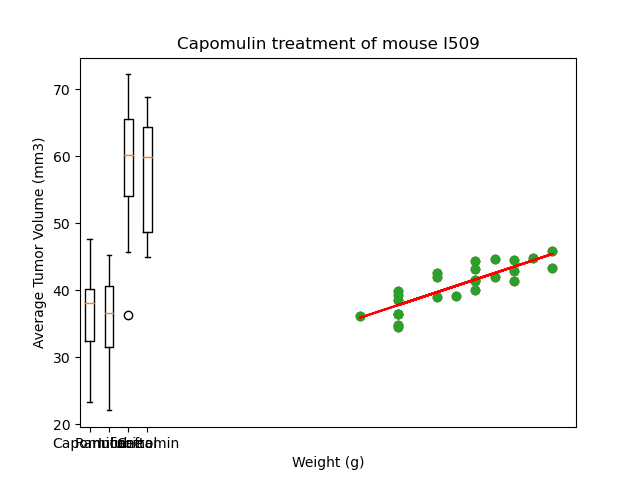

In [24]:
#generate box plot of the final tumor volume of each mouse
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
fig1, ax1 = plt.subplots()
plt.boxplot(tumor_data, labels = treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


In [33]:
#generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]
mouse_I509 = capomulin_mouse.loc[clean_data_df["Mouse ID"] == "I509"]

x = mouse_I509["Timepoint"]
y = mouse_I509["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [35]:
#generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with Capomulin 
capomulin_average = capomulin_mouse.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
plt.scatter(x,y)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()



In [43]:
#calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
correlation =(st.pearsonr(x, y)[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation [0], 2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [47]:
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x*slope + intercept
plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


In [ ]:
#Three observations that can be concluded:
#From the data generated, I can conclude that Infubinol and Ceftamin have higher average tumor volumes in comparisono to Capomulin and Ramicane
#I can also conclude that Capomulin and Ramicane had almost at least 100 more mice tested than any of the other drug regimens
#Finally, I can conclude that there is a very high, strong, positive correlation between the mouse weight and the average tumor volume